## Importing the mushroom data

In [76]:
import pandas as pd
file = "mushrooms.csv"
df = pd.read_csv(file)

## Edibility label encoding scheme
* 1 is equivalent to a poisonous mushroom
* 0 is equivalent to an edible mushroom

In [77]:
labels = [(1 if cls == 'p' else 0) for cls in df['class']] 
df_wo_class = df.drop(['class'], axis=1)

## Glancing at the data

In [78]:
pd.options.display.max_columns = None
df_wo_class.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


Encode the characters according to their unicode code point before one-shot encoding

In [79]:
df_wo_class_numeric = df_wo_class.copy()
for col in df_wo_class.columns:
    for k in range(len(df_wo_class[col])):
        df_wo_class_numeric[col][k] = ord(df_wo_class[col][k])

In [80]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
df_wo_class_one_hot = enc.fit_transform(df_wo_class_numeric)

One-hot encoding gives rise to 117 columns, compared to the original (22 raw categorical)

In [81]:
df_wo_class_one_hot.toarray().shape[1]

117

## Random forest model

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_one_hot, labels, test_size = 0.94, random_state = 314159265)

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=18, max_depth=3, max_features=16)
rf_model.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=16,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Calculate basic mean error (meaningful since the two calsses are roughly balanced)

In [84]:
predictions = rf_model.predict(test_features)
errors = abs(predictions - test_labels)
print(f'Mean Error: {np.mean(errors):.3%}')

Mean Error: 2.671%


ROC curve for the random forest model

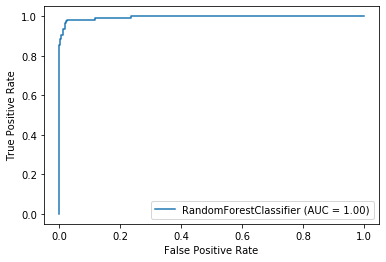

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

# Calculate roc auc
roc_value = plot_roc_curve(rf_model, test_features, test_labels)
plt.show()

Area under the curve – numerically

In [86]:
from sklearn.metrics import roc_auc_score
print('Random forest AUC score:', roc_auc_score(rf_model.predict(test_features), test_labels))

Random forest AUC score: 0.9735346749323068


Visualizing one of the trees – out of curiosity:

[Text(186.0, 190.26, 'X[58] <= 0.5\ngini = 0.495\nsamples = 305\nvalue = [269, 218]'),
 Text(111.60000000000001, 135.9, 'X[54] <= 0.5\ngini = 0.36\nsamples = 97\nvalue = [36, 117]'),
 Text(74.4, 81.53999999999999, 'X[88] <= 0.5\ngini = 0.12\nsamples = 84\nvalue = [8, 117]'),
 Text(37.2, 27.180000000000007, 'gini = 0.32\nsamples = 8\nvalue = [8, 2]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 76\nvalue = [0, 115]'),
 Text(148.8, 81.53999999999999, 'gini = 0.0\nsamples = 13\nvalue = [28, 0]'),
 Text(260.40000000000003, 135.9, 'X[29] <= 0.5\ngini = 0.422\nsamples = 208\nvalue = [233, 101]'),
 Text(223.20000000000002, 81.53999999999999, 'X[36] <= 0.5\ngini = 0.385\nsamples = 195\nvalue = [233, 82]'),
 Text(186.0, 27.180000000000007, 'gini = 0.114\nsamples = 127\nvalue = [201, 13]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.433\nsamples = 68\nvalue = [32, 69]'),
 Text(297.6, 81.53999999999999, 'gini = 0.0\nsamples = 13\nvalue = [0, 19]')]

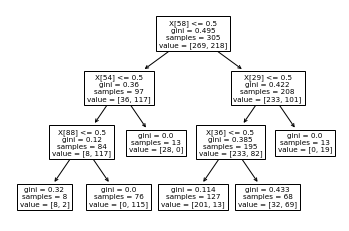

In [87]:
import sklearn

estimator = rf_model.estimators_[7]
sklearn.tree.plot_tree(estimator)

## K-nearest neighour model
reduce the size of the training dataset since the model easily tops the charts

In [88]:
train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_one_hot, labels, test_size = 0.94, random_state = 161803398)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10, leaf_size=10)
knn_model.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

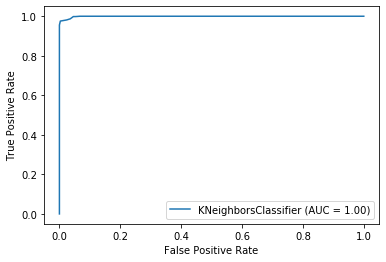

In [90]:
roc_value = plot_roc_curve(knn_model, test_features, test_labels)
plt.show()

In [91]:
print('K-NN AUC score:', roc_auc_score(knn_model.predict(test_features), test_labels))

K-NN AUC score: 0.9757307637172736


## Multilayer Perceptron model 1

In [92]:
train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_one_hot, labels, test_size = 0.94, random_state = 161803398)

In [93]:
from sklearn.neural_network import MLPClassifier

mlp1_model = MLPClassifier(
    max_iter=10_000,
    activation='relu',
    alpha=10,
    solver='adam',
    learning_rate='adaptive'
)
mlp1_model.fit(train_features, train_labels)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

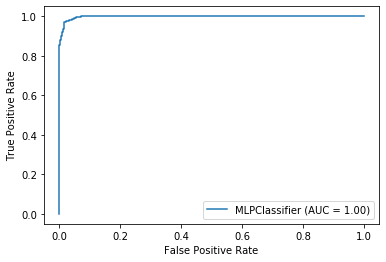

In [94]:
roc_value = plot_roc_curve(mlp1_model, test_features, test_labels)
plt.show()

In [95]:
print('MLP1 AUC score:', roc_auc_score(mlp1_model.predict(test_features), test_labels))

MLP1 AUC score: 0.9750348118512298


## Multilayer Perceptron model 2

In [96]:
train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_one_hot, labels, test_size = 0.94, random_state = 161803398)

In [97]:
from sklearn.neural_network import MLPClassifier

mlp2_model = MLPClassifier(
    max_iter=10_000,
    activation='logistic',
    alpha=0.02,
    solver='sgd',
    learning_rate='adaptive'
)
mlp2_model.fit(train_features, train_labels)

MLPClassifier(activation='logistic', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

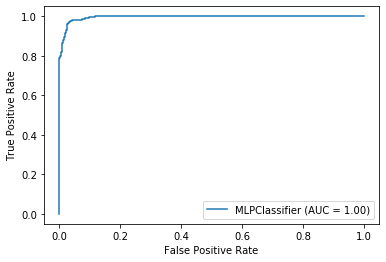

In [98]:
roc_value = plot_roc_curve(mlp2_model, test_features, test_labels)
plt.show()

In [99]:
print('MLP2 AUC score:', roc_auc_score(mlp2_model.predict(test_features), test_labels))

MLP2 AUC score: 0.9692739207988499


## Support Vector Machine model

In [100]:
train_features, test_features, train_labels, test_labels = \
    train_test_split(df_wo_class_one_hot, labels, test_size = 0.94, random_state = 161803398)

In [101]:
from sklearn.svm import SVC

svm_model = SVC(kernel='sigmoid', degree=2, random_state = 14142135)
svm_model.fit(train_features, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=14142135, shrinking=True,
    tol=0.001, verbose=False)

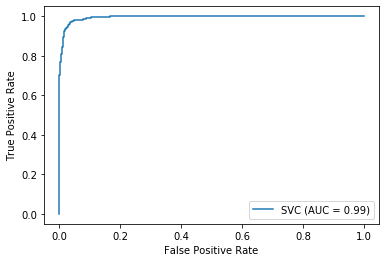

In [102]:
roc_value = plot_roc_curve(svm_model, test_features, test_labels)
plt.show()

In [103]:
print('SVM AUC score:', roc_auc_score(svm_model.predict(test_features), test_labels))

SVM AUC score: 0.9619386909011602


# Summary

Neural Networks, Random Forest, as well as the simple K-Nearest Neighbour model, all demonstrated excellent performance — as measured by the AUC — given the fact that only 6% of data was used for training. The remaining approach showed quite similar, decent performance: Support Vector Machine.